In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt


import matplotlib.pyplot as plt
from matplotlib import style

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
results_june = []
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(results_june, columns=['date','June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
results_dec = []
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results_dec, columns=['date','December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


MORE QUERIES -    
June and December preciptation something

In [12]:
results_prcp_june =[]
results_prcp_june = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

df_june_prcp = pd.DataFrame(results_prcp_june, columns = ['date', 'June prcp'])
df_june_prcp.set_index(df_june_prcp['date'], inplace=True)

In [13]:
df_june_prcp.describe()

,June prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [14]:
results_prcp_dec =[]
results_prcp_dec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

df_dec_prcp = pd.DataFrame(results_prcp_dec, columns = ['date', 'Dec prcp'])
df_dec_prcp.set_index(df_dec_prcp['date'], inplace=True)

In [15]:
df_dec_prcp.describe()

,Dec prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


Text(0.5, 0, 'Month')

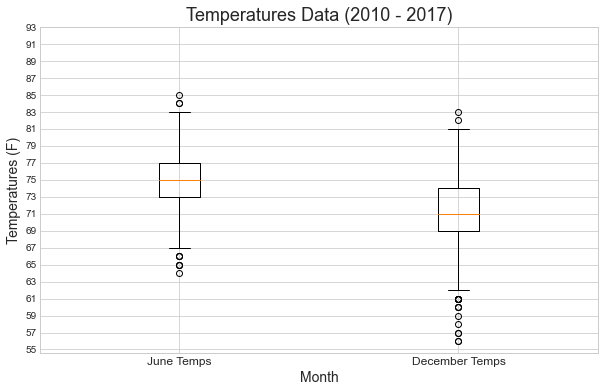

In [16]:
#Style
plt.style.use('seaborn-whitegrid')

#Plot the Box & Whiskers
x_labels = ["June Temps", "December Temps"]
temps = [df_june["June Temps"], df_dec["December Temps"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(55, 95, step=2.0))
ax.set_title('Temperatures Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Temperatures (F)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

In [17]:
#Drop the null values:
df_june_prcp = df_june_prcp.dropna()
df_dec_prcp = df_dec_prcp.dropna()

Text(0.5, 0, 'Month')

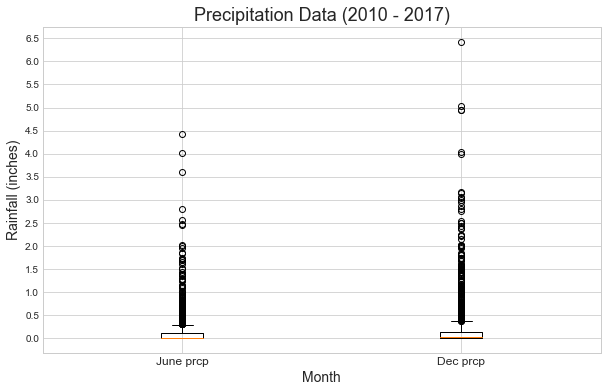

In [18]:
#Style
plt.style.use('seaborn-whitegrid')

#Plot the Box & Whiskers
x_labels = ["June prcp", "Dec prcp"]
temps = [df_june_prcp["June prcp"], df_dec_prcp["Dec prcp"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(0, 7, step=0.5))
ax.set_title('Precipitation Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Rainfall (inches)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

In [21]:
#Count the number of the outliers
#Calculate the sum of outliers_June
# Calculate the outliers
Q1_june = df_june_prcp["June prcp"].quantile(0.25)
Q3_june = df_june_prcp["June prcp"].quantile(0.75)
IQR_june = (df_june_prcp["June prcp"].quantile(0.75)) - (df_june_prcp["June prcp"].quantile(0.25))
#Calculate the sum of outliers
sum_of_outliers_june = ((df_june_prcp["June prcp"] < (Q1_june - 1.5 * IQR_june))
                        | (df_june_prcp["June prcp"] > (Q3_june + 1.5 * IQR_june))).sum()

sum_of_outliers_june

183

In [26]:
#Calculate the sum of outliers_Dec
# Calculate the outliers
Q1_dec = df_dec_prcp["Dec prcp"].quantile(0.25)
Q3_dec = df_dec_prcp["Dec prcp"].quantile(0.75)
IQR_dec = (df_dec_prcp["Dec prcp"].quantile(0.75)) - (df_dec_prcp["Dec prcp"].quantile(0.25))
#Calculate the sum of outliers
sum_of_outliers_dec = ((df_dec_prcp["Dec prcp"] < (Q1_dec - 1.5 * IQR_dec))
                        | (df_dec_prcp["Dec prcp"] > (Q3_dec + 1.5 * IQR_dec))).sum()

sum_of_outliers_dec

205

In [30]:
#June Rain by Year
df_june_prcp_index = df_june_prcp.set_index(df_june_prcp['date'], inplace=False)

#Sort the dates
df_june_prcp_index = df_june_prcp_index.sort_index()

#Set the index date to the date datatype
df_june_prcp_index.index = pd.to_datetime(df_june_prcp_index.index)

#Group by year
df_june_prcp_index_year = df_june_prcp_index.resample("Y").mean()
df_june_prcp_index_year

##Note: Grouping shows month 12, instead 6.

,June prcp
date,
2010-12-31,0.042241
2011-12-31,0.240142
2012-12-31,0.097062
2013-12-31,0.144195
2014-12-31,0.124372
2015-12-31,0.125160
2016-12-31,0.212312
2017-12-31,0.120000


In [31]:
#December Rain group by Year
#Set index to date
df_dec_prcp_index = df_dec_prcp.set_index(df_dec_prcp['date'], inplace=False)

#Sort the dates
df_dec_prcp_index = df_dec_prcp_index.sort_index()

#Set the index date to the date datatype
df_dec_prcp_index.index = pd.to_datetime(df_dec_prcp_index.index)

#Group by year
df_dec_prcp_index_year = df_dec_prcp_index.resample("Y").mean()
df_dec_prcp_index_year

,Dec prcp
date,
2010-12-31,0.459087
2011-12-31,0.201581
2012-12-31,0.089604
2013-12-31,0.169014
2014-12-31,0.188439
2015-12-31,0.169506
2016-12-31,0.199494


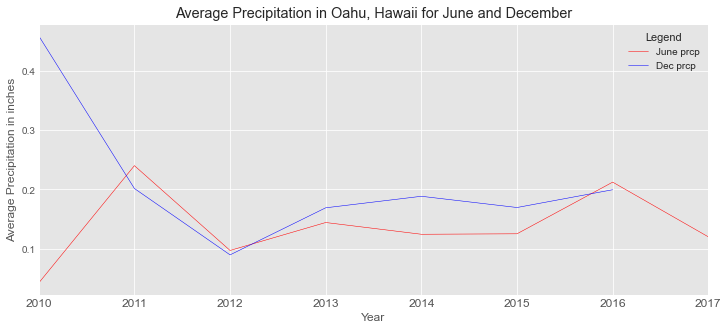

In [36]:
#June and December - graph - by year
#Style
style.use('ggplot')

#Plot the graph
ax = df_june_prcp_index_year.plot(c='red', linewidth=0.5)
df_dec_prcp_index_year.plot(ax=ax, c='blue', figsize=(12, 5), linewidth=0.5)

#Labels
ax.set_xlabel('Year')
ax.set_ylabel("Average Precipitation in inches")
ax.set_title("Average Precipitation in Oahu, Hawaii for June and December")

#Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

#Plot the legend
lgnd = plt.legend(fontsize="10", mode="Expanded",
         loc="best", title="Legend")
lgnd.get_title().set_fontsize(11)
plt.show()

In [ ]:
#####THE END  ######  Have a nice day!  